# Introduction to NLP Fundamentals in TensorFlow

## Check for GPU

In [1]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-5e14e2be-7bd4-a73a-23e6-206ca4cab10c)


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py

--2024-02-17 16:33:08--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-17 16:33:08 (101 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import *

## Get a text dataset

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-02-17 16:33:12--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.207, 172.253.119.207, 108.177.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2024-02-17 16:33:12 (133 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# total number of samples
len(train_df), len(test_df)

(7613, 3263)

In [12]:
# visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'target:{target}', "(real disaster)" if target > 0 else "(not real disater)")
  print(f'test:\n{text}')
  print("----\n")

target:0 (not real disater)
test:
But the sea would..electrocute us all.
----

target:1 (real disaster)
test:
Texas Seeks Comment on Rules for Changes to WindstormåÊInsurer http://t.co/92fwtObi3U
----

target:1 (real disaster)
test:
A diamond is just a piece of charcoal that handled stress exceptionally well. We are hard pressed on every side but not crushed.2 cor4:8
----

target:0 (not real disater)
test:
#Cowboys: George: Injury woes took Claiborne from first round to trying to stick around; can he do it?:  http://t.co/12giQbVLYs
----

target:0 (not real disater)
test:
@AsterPuppet wounded and carried her back to where his brothers and sisters were and entered the air ship to go back to Academia
----



### Split data into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=32)

In [15]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [16]:
# Chekc the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['#LOL Plymouth (\x89Û÷Let\x89Ûªs Obliterate Litter\x89Ûª) http://t.co/GDrssjbH8q',
        'AND MY FAM HAD TO EVACUATE BC WE NEED POWER',
        'MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... - ABC Onlin... http://t.co/N3lNdJKYo3 G #Malaysia #News',
        '\x89Û÷Good Samaritans\x89Ûª shot in horror hijacking http://t.co/V5yUUALoqw #263Chat #Twimbos ZimpapersViews',
        "#FOXDebateQuestions:  To what degree has Obama's efforts to institute Sharia Law exacerbated the California wild fires?",
        "Looks like a war zone outside. What's going on?",
        '#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/8JcYXhq1AZ #prebreak #best',
        "Doing Giveaway Music Kit Dren Death's Head Demolition: http://t.co/fHKhCqPl7j",
        'BBC News - India rail crash: Trains derail in Madhya Pradesh flash flood http://t.co/fU1Btuq1Et',
        "'Gunman who opened fire at Tennessee movie theater killed by

## Converting text into number

 ### Text Vectorization

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [18]:
text_vectorizer = TextVectorization(max_tokens=1000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

In [19]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [21]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [22]:
# Create a sample sentence and tokenize it
sample_sentence = "there's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[266,   3, 208,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'original text:\n{random_sentence}\
        \n\nVectorized version:')
text_vectorizer([random_sentence])

original text:
Panic! at the Disco is the best song by this is gospel (acoustic) http://t.co/VCq2icptKI        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 341,   16,    2, 1688,    9,    2,  146,  507,   18,   19,    9,
           1, 6267,    1,    0]])>

In [24]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()

In [25]:
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
top_5_words, bottom_5_words

(['', '[UNK]', 'the', 'a', 'in'],
 ['pantofel', 'panties', 'panther', 'pantalonesfuego', 'panoramic'])

### Creating an Embedding using an Embedding Layer

In [26]:
import tensorflow as tf

embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)

embedding

In [27]:
random_sentence = random.choice(train_sentences)
print(f'original text:\n {random_sentence}\
      \n\nEmbedding version:')
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original text:
 Udhampur terror attack: NIA takes over probe Pakistani terrorist quizzed; Pak denies link  http://t.co/ogZJOkd7Sv  #Elections #AcheDin #Û_      

Embedding version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02345735, -0.02142968,  0.04008253, ..., -0.03638202,
          0.00124143,  0.00703939],
        [ 0.01556212, -0.01597194, -0.01936157, ...,  0.02995861,
         -0.00228234, -0.0229176 ],
        [-0.04511242,  0.04672903, -0.04709356, ...,  0.01416731,
          0.02624575,  0.03252811],
        ...,
        [-0.04485755, -0.03528284,  0.02251352, ...,  0.0262933 ,
          0.0307475 ,  0.04702871],
        [-0.01720256, -0.00266091,  0.04433418, ...,  0.01930108,
          0.00198476, -0.03218122],
        [-0.01720256, -0.00266091,  0.04433418, ...,  0.01930108,
          0.00198476, -0.03218122]]], dtype=float32)>

In [28]:
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02345735, -0.02142968,  0.04008253,  0.04098083, -0.01327276,
         0.03026273, -0.00693526, -0.02008371, -0.03227693, -0.00970775,
         0.00131897,  0.01325366,  0.03545905,  0.02782415, -0.00115616,
        -0.00538187, -0.04356745, -0.03944844, -0.02655712,  0.03155107,
         0.01111157, -0.02744986,  0.04823035, -0.03074439, -0.02685373,
        -0.03603444, -0.04311541, -0.0181368 , -0.01215246,  0.02020479,
         0.03835627,  0.02363804, -0.01243605, -0.01715899, -0.03223979,
        -0.02642503, -0.00096768, -0.01001885, -0.02569323, -0.01913937,
         0.00333716, -0.03107622, -0.00035031, -0.02166779, -0.03818063,
         0.04434225,  0.04531348, -0.02049662,  0.034182  , -0.0352026 ,
        -0.00523081, -0.02983679,  0.01547969, -0.01296622, -0.04324545,
         0.02858088,  0.02402971,  0.04342106, -0.03845549,  0.03579709,
        -0.0234418 , -0.02403941,  0.02376865, -0.02967023, -0.04101081,
  

## Modelling a text dataset

* Model 0: Naive Bayes (baseline)
* Model 1: feed-forward neural network (dense model)
* Model 2: LSTM model(RNN)
* Model 3: GRU model(RNN)
* Model 4: bidirectional-LSTM model(RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extrator
* Model 7: Same as model 6 with 10% of training data

### Model 0: baseline

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Fit the pipline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'our baseline model achieves an accuracy of:{baseline_score*100:.2f}%')

our baseline model achieves an accuracy of:79.53%


In [31]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [32]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

### evaluation function

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluations(y_true, y_pred):
  eval = {}
  eval['accuracy'] = accuracy_score(y_true, y_pred) * 100
  eval['precision'] = precision_score(y_true, y_pred, average='weighted')
  eval['recall'] = recall_score(y_true, y_pred, average='weighted')
  eval['f1'] = f1_score(y_true, y_pred, average='weighted')

  return eval



In [34]:
baseline_results = evaluations(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.52755905511812,
 'precision': 0.8123798624937205,
 'recall': 0.7952755905511811,
 'f1': 0.7894130279169649}

### Model 1: simple dense model

In [35]:
# Build model with the functional API
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [37]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [38]:
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 20s 73ms/step - loss: 0.6100 - accuracy: 0.6873 - val_loss: 0.5251 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4431 - accuracy: 0.8178 - val_loss: 0.4560 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3485 - accuracy: 0.8603 - val_loss: 0.4445 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2858 - accuracy: 0.8905 - val_loss: 0.4579 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2388 - accuracy: 0.9120 - val_loss: 0.4706 - val_accuracy: 0.7940


In [39]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7940


[0.4706276059150696, 0.7939632534980774]

In [40]:
model_1_predictions = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [41]:
model_1_predictions.shape

(762, 1)

In [42]:
model_1_predictions[:10]

array([[0.2917684 ],
       [0.16868128],
       [0.02717476],
       [0.92492944],
       [0.00505509],
       [0.76583594],
       [0.00932788],
       [0.45058483],
       [0.22364707],
       [0.38610393]], dtype=float32)

In [43]:
model_1_preds = tf.squeeze(tf.round(model_1_predictions))

In [44]:
model_1_results = evaluations(val_labels, model_1_preds)

In [45]:
model_1_results

{'accuracy': 79.39632545931758,
 'precision': 0.7958267987399408,
 'recall': 0.7939632545931758,
 'f1': 0.7922977883371181}

## Visualizing learned embeddings

In [46]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [48]:
# Get the weight matrix of embeding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [49]:
# Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [50]:
# Download files from colab projector.tensorflow.org
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

## Recurrent Neural Networks (RNN)

## Model 2: LSTM

In [51]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.LSTM(units=64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [52]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [53]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [54]:
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 11s 40ms/step - loss: 0.2205 - accuracy: 0.9199 - val_loss: 0.6005 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1527 - accuracy: 0.9419 - val_loss: 0.6331 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1284 - accuracy: 0.9523 - val_loss: 0.6838 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1064 - accuracy: 0.9622 - val_loss: 0.6983 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0858 - accuracy: 0.9667 - val_loss: 0.9229 - val_accuracy: 0.7625


In [55]:
model_2_pred_probs = model_2.predict(val_sentences)


24/24 [==============================] - 0s 3ms/step


In [56]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [57]:
model_2_results = evaluations(val_labels, model_2_preds)

In [58]:
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.763200646165304,
 'recall': 0.7624671916010499,
 'f1': 0.760793313170184}

In [59]:
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2_1 = tf.keras.Model(inputs, outputs)
model_2_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                             

In [60]:
model_2_1.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [61]:
history_2_1 = model_2_1.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 12s 40ms/step - loss: 0.1402 - accuracy: 0.9569 - val_loss: 0.8425 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0772 - accuracy: 0.9695 - val_loss: 1.0018 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0618 - accuracy: 0.9731 - val_loss: 1.2206 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0555 - accuracy: 0.9749 - val_loss: 1.2124 - val_accuracy: 0.7480
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0502 - accuracy: 0.9749 - val_loss: 0.9796 - val_accuracy: 0.7585


### Model 3: GRU

In [62]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(64)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [63]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [64]:
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 37ms/step - loss: 0.1424 - accuracy: 0.9447 - val_loss: 0.8687 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0713 - accuracy: 0.9729 - val_loss: 0.9199 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0610 - accuracy: 0.9750 - val_loss: 0.9213 - val_accuracy: 0.7441
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0526 - accuracy: 0.9762 - val_loss: 1.2085 - val_accuracy: 0.7375
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0462 - accuracy: 0.9787 - val_loss: 1.3277 - val_accuracy: 0.7520


In [65]:
model_3_pred_probs = model_3.predict(val_sentences)


24/24 [==============================] - 1s 3ms/step


In [66]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [67]:
model_3_results = evaluations(val_labels, model_3_preds)
model_3_results

{'accuracy': 75.19685039370079,
 'precision': 0.7532898331561133,
 'recall': 0.7519685039370079,
 'f1': 0.7496916643317821}

### Model 4: bidirectional lstm

In [68]:
# build a bidirectional RNN in tensorflow
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs)
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable params: 1378945 (

In [69]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [70]:
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.0925 - accuracy: 0.9756 - val_loss: 1.1858 - val_accuracy: 0.7415
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0517 - accuracy: 0.9764 - val_loss: 1.1334 - val_accuracy: 0.7428
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0400 - accuracy: 0.9807 - val_loss: 1.2683 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0430 - accuracy: 0.9804 - val_loss: 1.3979 - val_accuracy: 0.7441
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0384 - accuracy: 0.9812 - val_loss: 1.5080 - val_accuracy: 0.7467


In [71]:
model_4_pred_probs = model_4.predict(val_sentences)

24/24 [==============================] - 1s 5ms/step


In [72]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [73]:
model_4_results = evaluations(val_labels, model_4_preds)

In [74]:
model_4_results

{'accuracy': 74.67191601049869,
 'precision': 0.7462878238764609,
 'recall': 0.7467191601049868,
 'f1': 0.7459307204139188}

### Model 5: convolution 1d

In [75]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs)
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_6 (Dense)             (None, 1)                 65  

In [76]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [77]:
history_5 = model_5.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.1142 - accuracy: 0.9664 - val_loss: 0.9422 - val_accuracy: 0.7441
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0685 - accuracy: 0.9734 - val_loss: 1.1199 - val_accuracy: 0.7270
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0599 - accuracy: 0.9759 - val_loss: 1.1887 - val_accuracy: 0.7388
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0523 - accuracy: 0.9794 - val_loss: 1.2269 - val_accuracy: 0.7388
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0491 - accuracy: 0.9787 - val_loss: 1.3013 - val_accuracy: 0.7310


In [78]:
 model_5_pred_probs = model_5.predict(val_sentences)
 model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
 model_5_results = evaluations(val_labels, model_5_preds)

24/24 [==============================] - 0s 2ms/step


In [79]:
model_5_results

{'accuracy': 73.0971128608924,
 'precision': 0.7305189618096157,
 'recall': 0.7309711286089239,
 'f1': 0.7298162602176969}

## Model 6: Tensorflow hub use* feature extractor

In [80]:
import tensorflow_hub as hub
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")
embed_samples = embed([sample_sentence,
                        "when you can the universal sentence encoder on a sentence, it turns it into numbers."])

In [81]:
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [82]:
embed_samples[0].shape

TensorShape([512])

In [83]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')


In [84]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer, # take in sentences and then encode them into an embedding
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name='model_6_USE')

In [85]:
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [86]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [87]:
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        epochs=10,
                        validation_data=(val_sentences, val_labels),
                        verbose=1)

Epoch 1/10
215/215 [==============================] - 5s 14ms/step - loss: 0.5100 - accuracy: 0.7819 - val_loss: 0.4326 - val_accuracy: 0.8071
Epoch 2/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4179 - accuracy: 0.8136 - val_loss: 0.4212 - val_accuracy: 0.8176
Epoch 3/10
215/215 [==============================] - 3s 16ms/step - loss: 0.4030 - accuracy: 0.8228 - val_loss: 0.4223 - val_accuracy: 0.8176
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3940 - accuracy: 0.8278 - val_loss: 0.4100 - val_accuracy: 0.8215
Epoch 5/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3872 - accuracy: 0.8345 - val_loss: 0.4143 - val_accuracy: 0.8176
Epoch 6/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3815 - accuracy: 0.8356 - val_loss: 0.4056 - val_accuracy: 0.8294
Epoch 7/10
215/215 [==============================] - 4s 16ms/step - loss: 0.3739 - accuracy: 0.8378 - val_loss: 0.4042 - val_accuracy: 0.8189

In [88]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = evaluations(val_labels, model_6_preds)

24/24 [==============================] - 1s 13ms/step


In [89]:
model_6_results

{'accuracy': 82.54593175853019,
 'precision': 0.8271608677120488,
 'recall': 0.8254593175853019,
 'f1': 0.824315893035989}

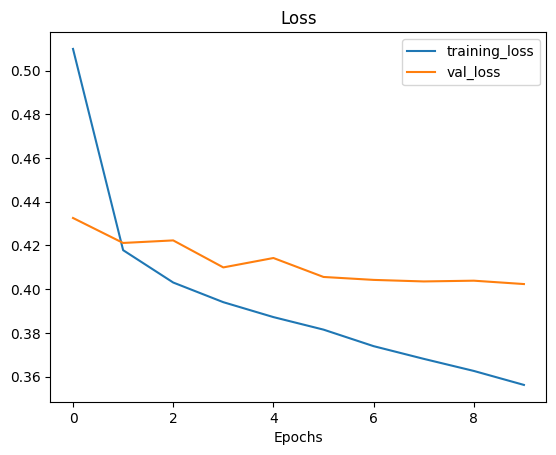

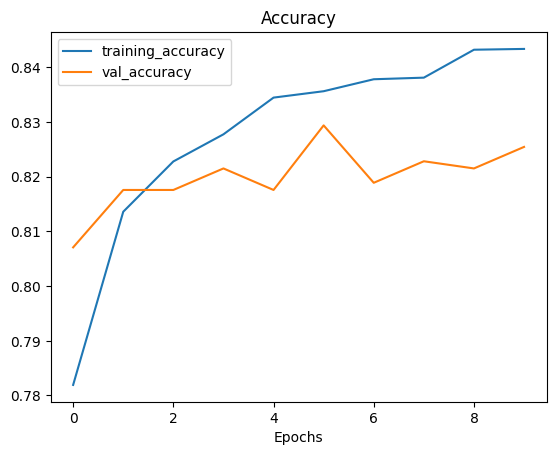

In [90]:
plot_loss_curves(history_6)

## Model 7: TF Hub 10% of training data

In [92]:
#data leakage
# Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
# len(train_10_percent)

train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [93]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    386
1    299
dtype: int64

In [ ]:
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
# Check the nubmer of targets in our subset of data
# train_10_percent['target'].value_counts()

In [94]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [95]:
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                       input_shape=[],
                       dtype=tf.string)

model_7 = tf.keras.Sequential([
    embed,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [96]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [97]:
history_7 = model_7.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 4s 44ms/step - loss: 0.6725 - accuracy: 0.6949 - val_loss: 0.6469 - val_accuracy: 0.7690
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6062 - accuracy: 0.8000 - val_loss: 0.5821 - val_accuracy: 0.7795
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5336 - accuracy: 0.8029 - val_loss: 0.5230 - val_accuracy: 0.7861
Epoch 4/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4716 - accuracy: 0.8058 - val_loss: 0.4887 - val_accuracy: 0.7861
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4320 - accuracy: 0.8161 - val_loss: 0.4720 - val_accuracy: 0.7927


In [98]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = evaluations(val_labels, model_7_preds)
model_7_results

24/24 [==============================] - 1s 9ms/step


{'accuracy': 79.26509186351706,
 'precision': 0.7931061413519097,
 'recall': 0.7926509186351706,
 'f1': 0.7916283299175436}

## Comparing the performance of each of our models

In [99]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline":baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional":model_4_results,
                                  "5_conv1d":model_5_results,
                                  "6_tf_hub_use_encoder":model_6_results,
                                  "7_tf_hub_10_percent":model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.527559,0.812380,0.795276,0.789413
1_simple_dense,79.396325,0.795827,0.793963,0.792298
2_lstm,76.246719,0.763201,0.762467,0.760793
3_gru,75.196850,0.753290,0.751969,0.749692
4_bidirectional,74.671916,0.746288,0.746719,0.745931
5_conv1d,73.097113,0.730519,0.730971,0.729816
6_tf_hub_use_encoder,82.545932,0.827161,0.825459,0.824316
7_tf_hub_10_percent,79.265092,0.793106,0.792651,0.791628


In [100]:
# reduce the accuracy to the same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.795276,0.812380,0.795276,0.789413
1_simple_dense,0.793963,0.795827,0.793963,0.792298
2_lstm,0.762467,0.763201,0.762467,0.760793
3_gru,0.751969,0.753290,0.751969,0.749692
4_bidirectional,0.746719,0.746288,0.746719,0.745931
5_conv1d,0.730971,0.730519,0.730971,0.729816
6_tf_hub_use_encoder,0.825459,0.827161,0.825459,0.824316
7_tf_hub_10_percent,0.792651,0.793106,0.792651,0.791628


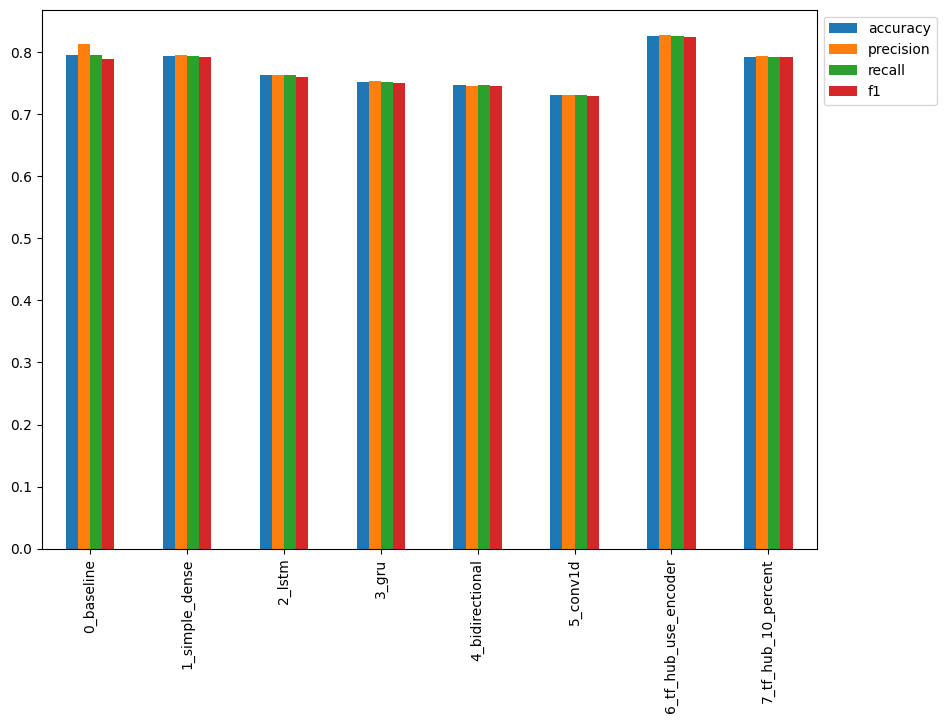

In [101]:
# plot_and compare all model results
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

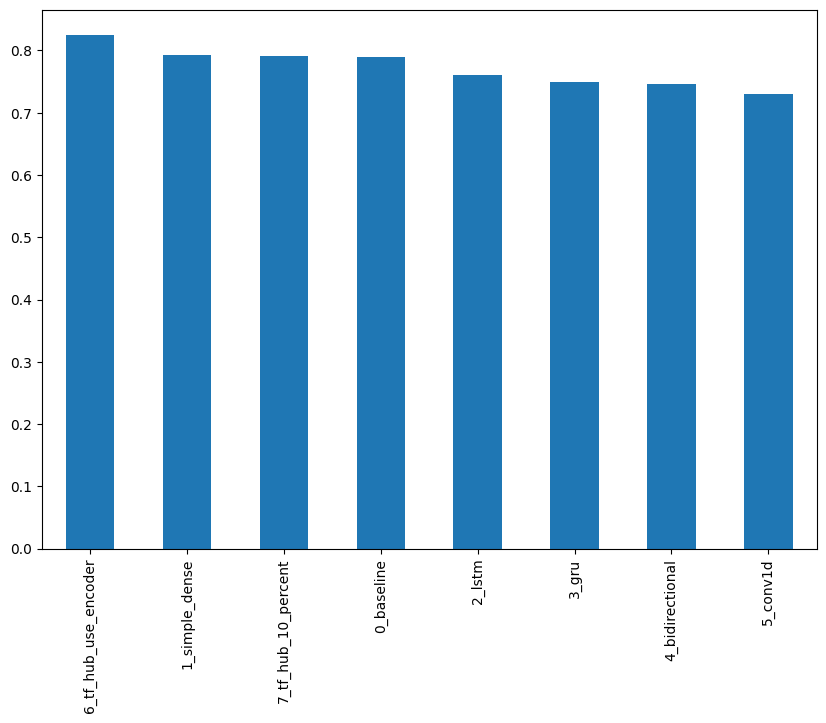

In [102]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)['f1'].plot(kind='bar', figsize=(10, 7))

In [103]:
# Save the best model
model_6.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
loaded_best_model = tf.keras.models.load_model('best_model.h5',
                                               custom_objects={'KerasLayer':hub.KerasLayer})

In [105]:
loaded_model_pred_probs = loaded_best_model.predict(val_sentences)
loaded_model_preds = tf.squeeze(tf.round(loaded_model_pred_probs))
loaded_model_results = evaluations(val_labels, loaded_model_preds)
loaded_model_results

24/24 [==============================] - 1s 9ms/step


{'accuracy': 82.54593175853019,
 'precision': 0.8271608677120488,
 'recall': 0.8254593175853019,
 'f1': 0.824315893035989}

In [106]:
model_6_results

{'accuracy': 82.54593175853019,
 'precision': 0.8271608677120488,
 'recall': 0.8254593175853019,
 'f1': 0.824315893035989}

 ## Finding the most wrong examples

 * active learning

In [107]:
# Download a pretrain model
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2024-02-17 16:40:47--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.207, 172.217.214.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   145MB/s    in 11s     

2024-02-17 16:40:58 (84.0 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [108]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [110]:
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor/")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 19ms/step - loss: 0.3640 - accuracy: 0.8294


[0.36397093534469604, 0.8293963074684143]

In [111]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 26ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [113]:
val_df = pd.DataFrame({'text':val_sentences,
                       'target':val_labels,
                       'pred':model_6_pretrained_preds,
                       'pred_prob':tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,Is he about to crash?\nDid the Queen die?\nDid...,1,0.0,0.137729
1,Praise God that we have ministry that tells it...,0,0.0,0.121592
2,Last Chance Animal Rescue has 3 new posts. htt...,0,0.0,0.038939
3,'Among other main factors behind pedestrian fa...,1,1.0,0.849845
4,@iamHorsefly hide your kids hide your wife. He...,0,0.0,0.036543


In [117]:
# Find the wrong predictions
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
325,DISASTER AVERTED: Police kill gunman with Û÷h...,0,1.0,0.984139
582,Emergency Dispatchers in Boone County in the h...,0,1.0,0.876249
83,Tales of the #trees #deep water loving #Lake T...,0,1.0,0.869775
660,New doco tonight at 9pm Setanta Sports Ireland...,0,1.0,0.806903
57,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
51,'Dangerous' property in downtown Phoenix demol...,0,1.0,0.792731
77,China detains seven Christians trying to prote...,0,1.0,0.791277
609,Bloor/Ossington arsonist also burned a mattres...,0,1.0,0.781458
655,#stlouis #caraccidentlawyer Speeding Among Top...,0,1.0,0.780523
632,Ah yes the gays are totally destroying America...,0,1.0,0.778259


from matplotlib import pyplot as plt
_df_0['pred_prob'].plot(kind='hist', bins=20, title='pred_prob')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['pred_prob']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('pred_prob')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['target']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'target'}, axis=1)
              .sort_values('target', ascending=True))
  xs = counted['target']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pred']
  ys = series['pred_prob']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('pred', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pred')
_ = plt.ylabel('pred_prob')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['pred']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'pred'}, axis=1)
              .sort_values('pred', ascending=True))
  xs = counted['pred']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('pred', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pred')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['pred_prob'].plot(kind='line', figsize=(8, 4), title='pred_prob')
plt.gca().spines[['top', 'right']].set_visible(False)

In [119]:
most_wrong.tail()

,text,target,pred,pred_prob
431,Rand Paul's Debate Strategy 'demolish Some oth...,1,0.0,0.098877
134,Jack Wilshere has poor injury recordand his of...,1,0.0,0.097724
522,?? New Ladies Shoulder Tote #Handbag Faux Leat...,1,0.0,0.091532
575,The Dress Memes Have Officially Exploded On Th...,1,0.0,0.078386
339,Feel like I've got no control of anything that...,1,0.0,0.067387


KeyError: 431